# Données

Ce fichier modélise le déplacement des véhicules de manière stocastique à partir des données tiré d'un [rapport du gouvenement](http://www.side.developpement-durable.gouv.fr/search.aspx?DETAIL_MODE=true&QUERY=sys_base:SYRACUSE%20AND%20InfodocIdentifier_exact:IFD_REFDOC_TEMIS_0069678#/Detail/(query:(Id:0,Index:1,NBResults:1,Page:0,PageRange:3,ResultSize:-1,SearchQuery:(InitialSearch:!t,Page:0,QueryString:'sys_base:SYRACUSE%20AND%20InfodocIdentifier_exact:IFD_REFDOC_TEMIS_0069678',ResultSize:-1,ScenarioCode:DEFAULT,SearchContext:0,SearchLabel:'')))) et datant de 2011.

Le but est connaître les horaires de déplacements des acteurs et la longueur des trajets.

## Détail des donneés

Le diagramme suivant présente la répartition des déplacements quotidiens moyens d’un véhicule par tranche de kilomètres
parcourus. Il tient compte de tous les déplacements en véhicule particulier, quelle que soit la distance parcourue par
déplacement (sont inclus les déplacements de plus de 80 km) pendant sept jours consécutifs. Seuls les voitures particulières et
les véhicules utilitaires légers sont pris en compte. La distance prise en considération est la distance routière réalisée, elle est
calculée par le logiciel Odomatrix. On dispose de 40 518 observations.

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code de Roman

In [2]:
# departure time in week day morning p44
P_am1 = [0,0,0,0,0,0.2,0.2,0.4,1,1.5,1.5,2.1,2.5,5.8,10.5,15,12.2,9,3.8,1.8,1,
0.9,1,0.9,1.3,3.2,7.2,7.2,2.1,1,0.9,0.6,0.8,0.6,0.8,0.6,0.5,0.2,0.2,
0.4,0.5,0.4,0.1,0.1,0,0,0,0]
P_am1 = np.asarray(P_am1)/100
P_am1 = np.cumsum(P_am1)
# arriving time in week day morning p44
P_am2 = [0,0,0,0,0,0,0.1,0.2,0.4,1.8,2.1,2.1,1.8,4,6.5,13.5,14,11.9,7,2.1,
1.7,1,1,1.2,1.2,2.2,5.5,8,3.8,1.2,1,0.6,0.8,0.6,0.8,0.6,0.4,0.3,0.2,
0.3,0.3,0.4,0.1,0.2,0,0,0,0]
P_am2 = np.asarray(P_am2)/100
P_am2 = np.cumsum(P_am2)
# P_am2 = np.min(P_am1,P_am2)

# departure time in week day evening p45
P_pm1 = [0.2,0.2,0.1,0.1,0.1,0,0,0,0.1,0,0.2,0.1,0.2,0.3,0.5,0.5,0.9,1.5,1.5,
1.5,2.5,2.8,3.5,4.8,7.5,2.9,2.1,1.5,1.5,1.5,2.5,2.6,4.6,5.7,7.6,6.7,7.5,
5.5,5.2,3.2,2.8,1.5,1.6,0.9,1.1,1,0.9,0.5]
P_pm1 = np.asarray(P_pm1)/100
P_pm1 = np.cumsum(P_pm1)
# P_pm1 = np.min(P_am2,P_pm1)
# arriving time in week day evening p45
P_pm2 = [0.3,0.2,0.1,0.1,0.1,0.1,0.1,0,0.1,0.1,0.2,0.2,0.2,0.3,0.4,0.5,0.7,
1.1,1.5,1.4,2,2.5,3.1,4.1,7.8,3.9,2.1,1.8,1.5,1.5,2,2.5,3.5,5,6.4,6.5,
7.8,6.9,5.8,4.5,3.5,2.1,1.5,1,1,1,0.9,0.7]
P_pm2 = np.asarray(P_pm2)/100
P_pm2 = np.cumsum(P_pm2)
# P_pm2 = np.min(P_pm1,cumsum(P_pm2))
# daily commuting distance p37
D = np.linspace(5,100,20) # [5:5:100, 105] en matlab
P_d = np.asarray([1,2,4,5,5,5,5,5,5,4,4,4,3,3,2,2,2,1.5,1.5,1.5,36])/100

In [3]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.plot(P_am1, label="P_am1")
plt.plot(P_am2, label="P_am2")
plt.plot(P_pm1, label="P_pm1")
plt.plot(P_pm2, label="P_pm2")
plt.title("")
plt.xlabel("Heure")
plt.ylabel("Pourcentage")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(P_d)
plt.title("Répartition des distances parcourues par classes de distance, par véhicule \n par jour (en pourcentages*kilom ètres/som m e des kilom ètres)")
plt.xlabel("Distance")
plt.ylabel("Pourcentage")
plt.grid()
plt.show()

On voit que Roman c'est trompé de graph ici. Il a pris le pourcentage des trajet en fonction de leur importance pondéré par le kilométrage. Ce n'est pas du tout une fréquence d'occurence, mais plutôt un outils d'analyse des données.

## Code de Guénolé

Dans l'idéal, il faudrait les données suivantes :
- Nombre de trajet par jours
- Temps passé dans le véhicule par trajet (Temps non branché au réseau)
- Distance effectué lors de ce trajet (SoE)
- Distribution de probabilité de trajet durant une journée type

**Notes**

Les données sont les suivantes :
- Les déplacement quotidients ont une durée moyenne de 50 min (en comptant les weekends et vacances)
- On ne sais pas la probalité de faire plusiseur trajet avec la même voiture (on sait juste que les ménages possédant plus de voiture font plus d'aller-retour)

### Modélisation 1 : Temps de trajet des usagers (Domicile-travail)

**Attention :** Ces données ne concernent que le trajet **domicile-travail**.

Cette donnée sera difficile à tuliser si on rajoute les contraintes sur les probabilité de départ et d'arrivé (voir plus bas). Il faudra au minimum vérifier que le comportement des voitures se rapporche de la densité observé.

Dans tout les cas, on peut peut pas faire les trois chose en même temps car il n'y a que 3 variables.

In [4]:
index_temps_trajet_travail = np.asarray([2.5,8,13,21,45.5,60])
densite_temps_trajet_travail = np.asarray([14.5, 35.5, 30.5, 11, 5.5, 3])/100

In [5]:
mu = 11
sigma = 6
temps = np.linspace(1,30,30)
normal = 5/(sigma*(2*np.pi)**0.5)*np.exp(-(temps-mu)**2/(2*sigma**2))

width = 2
fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(index_temps_trajet_travail,densite_temps_trajet_travail, width)
ax.set_title("Répartition des temps de trajet pour un aller domicile-travail")
ax.set_xticks(index_temps_trajet_travail)
ax.set_ylabel("Probabilité")
ax.plot(temps,normal)
plt.grid()
plt.show()

normal = normal/np.sum(normal)

On approximera la densité des déplacement en dessous de 30min à une gaussienne de moyenne 11 et de variance 6. Elle sera tronqué en dessous de 0 et au dessus de 30min.
Les autres déplacement plus long seront tiré selon une loi normale.

### Modélisation 2 : Distance parcourue

In [6]:
index_dist = np.zeros(21)
index_dist[0:20] = np.linspace(2.5,97.5,20)
index_dist[-1] = 235
# Pour avoir ces données, j'ai fait une capture d'écran du graphique, l'ai mis dans Gimp, puis j'ai compté le nombre
# de pixel de chaque bar
densite_dist = [113, 215, 240, 233, 186, 164, 138, 115.5, 102, 82.4,
            69, 62, 49, 44.5, 38.2, 31, 29.4, 24.7, 24.5, 20, 160]
# On retire 1 car le bar commance à 1 pixel
densite_dist -= 4*np.ones(np.size(densite_dist))
# On divise par la somme pour avoir une probabilité ed départ
densite_dist /= np.sum(densite_dist)

In [7]:
width = 2
fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(index_dist,densite_dist, width)
ax.set_title("Répartition des distances")
ax.set_xticks(index_dist)
ax.set_ylabel("Probabilité")
plt.grid()
plt.show()

- Comme on a pas la donnée du temps de trajet, on le déduit de la distance parcouru. Ce n'est pas idéal car les petit trajet sont plus lent que les long (en ville) mais c'est ce nous utiliseront dans une première approximation.

- On discrise cette densité au même pas de temps que le densité de départ des véhicules au cours de la journée (Soit 30 min) pour en faire une densité de probabilité.

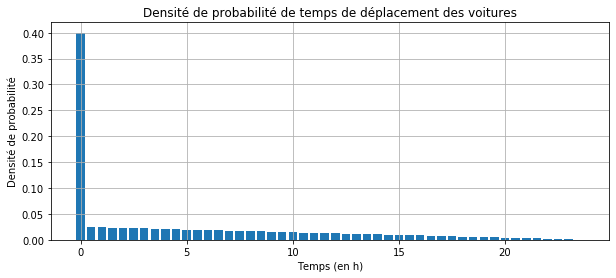

In [8]:
index_heure = np.linspace(0,23.5,48)
x0 = 0.4
densite_deplacement1 = np.zeros(48)
densite_deplacement1 = ((1-x0)/24)*(1-index_heure/24)
densite_deplacement1[0] = x0

width = 0.4
plt.figure(figsize=(10,4))
plt.bar(index_heure, densite_deplacement1, width)
plt.title("Densité de probabilité de temps de déplacement des voitures")
plt.xlabel("Temps (en h)")
plt.ylabel("Densité de probabilité")
plt.grid()
plt.show()

Cette statégie ne semble pas très bien focntionner, on va donc créer une autre forme de distribution

In [9]:
x0 = 1
x1 = 0.5
densite_deplacement2 = x0 + index_heure * (x1-x0)/24
densite_deplacement2 = densite_deplacement2/np.sum(densite_deplacement2)

width = 0.4
plt.figure(figsize=(10,4))
plt.bar(index_heure, densite_deplacement2, width)
plt.title("Densité de probabilité de temps de déplacement des voitures")
plt.xlabel("Temps (en h)")
plt.ylabel("Densité de probabilité")
plt.grid()
plt.show()

In [10]:
a0 = 30
b0 = 14
a1 = 1
b1 = 0.043
ind = 5
densite_deplacement3 = a0 - b0*index_heure
densite_deplacement3[ind:] = a1 - b1*index_heure[ind:]
densite_deplacement3[-1] = 0
densite_deplacement3 = densite_deplacement3/np.sum(densite_deplacement3)

width = 0.4
plt.figure(figsize=(10,4))
plt.bar(index_heure, densite_deplacement3, width)
plt.title("Densité de probabilité de temps de déplacement des voitures")
plt.xlabel("Temps (en h)")
plt.ylabel("Densité de probabilité")
plt.grid()
plt.show()

### Modélisation 3 : heure de départ et d'arrivé des voitures

- On modélise l'heure de départ, l'heure d'arrivé. Et on ajoute à postériori la distance effectué en fonction du temps de trajet.
- 3% des véhicules cirule encore à minuit --> **Voir comment gérer ce problème**

In [11]:
index_heure = np.linspace(0,23.5,48)
# Pour avoir ces données, j'ai fait une capture d'écran du graphique, l'ai mis dans Gimp, puis j'ai compté le nombre
# de pixel de chaque bar
densite_depart = [20, 13.2, 13.2, 10.2, 10.2, 6.8, 10, 10, 16.4,
               20, 26.5, 36.7, 50, 89.5, 173.4, 260, 300, 303,
               256.6, 233, 310, 270, 310, 316, 370, 206, 253,
               266, 263, 210, 256, 230, 327, 323, 403, 346, 383,
               270, 260, 170, 150, 83, 73, 46, 46, 39, 36, 33]
# On retire 1 car le bar commance à 1 pixel
densite_depart -= np.ones(np.size(densite_depart))
# On divise par la somme pour avoir une probabilité ed départ
densite_depart /= np.sum(densite_depart)


# Pour avoir ces données, j'ai fait une capture d'écran du graphique, l'ai mis dans Gimp, puis j'ai compté le nombre
# de pixel de chaque bar
densite_arrive = [23, 17, 13.5, 10, 10, 7, 10, 10, 10, 23,
              17, 33.5, 33.5, 64, 114, 219, 289, 312, 286,
              232, 286, 279.5, 292.5, 306, 393.2, 252, 215,
              255.5, 259, 215.3, 245, 232.3, 282.2, 312, 356,
              353, 386, 322.8, 279, 215, 178, 114.2, 80.8, 57.1,
              47.1, 44, 40.2, 40]
# On retire 1 car le bar commance à 2 pixel
densite_arrive -= 2*np.ones(np.size(densite_arrive))
# On divise par la somme pour avoir une probabilité ed départ
densite_arrive /= np.sum(densite_arrive)

In [12]:
width = 0.35
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(index_heure, densite_depart, width, label='Départ')
rects2 = ax.bar(index_heure, densite_arrive, width, label='Arrivé', alpha = 0.5)
ax.set_title("Proportion de véhicules arrivant en déplacement au cours d'une journée moyenne")
ax.set_xlabel("Heure de la journée")
ax.set_ylabel('Proportion (en probabilité)')
plt.grid()
plt.legend()
plt.show()

- Si on se place dans la modélisation "batterie équivalente" et si les véhicules ont toute la même capacité alors on peut consider qu'à un  temps t, aucune voiture ne circule. En effet, s'il y avait toujours une proportion de voiture à circuler, elles ne sera jamais disponible pour le réseau et diminuerais d'autant la capacité de la batterie équivalente.

**ATTENTION :** Cette modélisation n'est pas valable dans le cas générale car simplificatrice. Pour grossir le trait et trouver un exemple, on peut immaginer un scénario dans lequels la moitié du parc automobile suit ce profil les jours pair, font un jour de trajet et arrive les jours impairs. L'autre moitié du parc fait l'inverse. On aurait ainsi toujours la moitier du parc en train de rouler.
Cependant, au vu des autres données, on sait que moins de 3% des véhicules font des trajets de plus de 60min. La partie du parc toujours en movement est donc faible et nous la considérerons négligeable.

### Modélisation 4 : Capacités des batteries

#### Roman

In [13]:
# market share of EV
P_sell = np.asarray([56.5,15.2,11.1,4.8,3.1,2.5,1.8,1.5,1.5,0.8,0.6,0.1])/100
# capacities of most sold EV (Wh) 
E_max_sell = np.asarray([22,24,30,17.6,85,18.7,22,15,16,24.2,27,28])*1e3

#### Guénolé

In [14]:
index_capacite = np.asarray([52, 50, 40, 42.2, 39.2, 17.6, 67.1, 55.7, 38.3, 14.5])*1e3
densite_capacite = np.asarray([18817, 6455, 3738, 2793, 1850, 1790, 1513, 661, 553, 543])
densite_capacite = densite_capacite/np.sum(densite_capacite)

inds = index_capacite.argsort()
index_capacite = np.sort(index_capacite)
densite_capacite = densite_capacite[inds]

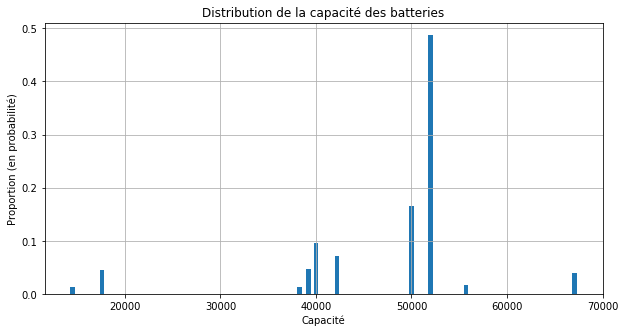

In [15]:
width = 500
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(index_capacite, densite_capacite, width)
ax.set_title("Distribution de la capacité des batteries")
ax.set_xlabel("Capacité")
ax.set_ylabel('Proportion (en probabilité)')
plt.grid()
plt.show()

### Environement

In [24]:
class Env: # Définition de notre classe Personne
    """Classe définissant un réseau électrique consititué des éléments suivants :
    - Véhicules (relié ou non au réseau)
    - Ferme éolienne
    - Heure de la journée
    - Pas temporel"""
    
    def __init__(self, dt, nb_vehicule_tot, index_heure, densite_depart, densite_arrive, densite_deplacement, index_capacite, densite_capacite): # Notre méthode constructeur
        """Défini :
        - Nombre de véhicule en circulation
        - Profil de déplacement de véhicule
        - Distance type parcouru par les véhicules
        - Profil de production de la centrale éolienne
        - Heure de la journée = 00h
        - Capacité de la batterie équivalente"""
        # Test des varleurs rentrés
        if abs(np.sum(densite_depart)-1)>1e-5 or abs(np.sum(densite_arrive)-1)>1e-5 or abs(np.sum(densite_capacite)-1)>1e-5 :
            raise ValueError('Les densité de probabilités doivents sommer à 1')
        # Test : la valeur de dt ne doit pas être farfelu
        if (not float(24/dt).is_integer()) or (dt>index_heure[1]) :
            raise ValueError("24/dt doit être entier et dt < index_heure[1]")
        # Test les valeurs des densitées doivent être ordonnée
        if not (index_heure == np.sort(index_heure)).all or not (index_capacite == np.sort(index_capacite)).all :
            raise ValueError("Les listes 'index' doivent être classé dans l'odre croissant")
        # Test the size of parameters
        if np.size(index_heure) != np.size(densite_depart) or np.size(index_heure) != np.size(densite_arrive) or np.size(index_heure) != np.size(densite_deplacement) or np.size(index_capacite) != np.size(densite_capacite) :
            raise ValueError("index et densité doivent avoir la même taille")
        # Convert probability density into cumulative probability (used to sample values later)
        self.cumul_depart = np.cumsum(densite_depart)
        self.cumul_arrive = np.cumsum(densite_arrive)
        self.cumul_capacite = np.cumsum(densite_capacite)
        # Pour evitez les problèmes d'arrondi qui ne somme pas à 1
        self.cumul_depart[-1] = 1
        self.cumul_arrive[-1] = 1
        self.cumul_capacite[-1] = 1
        
        self.densite_depart = densite_depart
        self.densite_arrive = densite_arrive
        self.index_heure = index_heure
        self.index_capacite = index_capacite
        self.heure = 0
        self.dt = dt
        self.nb_vehicule_tot = nb_vehicule_tot
        self.nb_vehicule_grid =  0
        self.densite_deplacement = densite_deplacement
        self.init_vehicules()
        # Table contenant les prochains horaire de départ et d'arriver de chaque véhicule
        self.table_circul = np.zeros((self.nb_vehicule_tot,2)) # Les départ sont initialisé à 0
        self.table_circul[:,1] = self.dt # Les arrivés sont initialisé à dt pour qu'à dt toutes les voitures soit disponible et qu'on ai initialiser facilement les horaires
        # Memoire de la densité de voiture branché au réseau
        self.save_densite_grid = np.zeros(int(24/self.dt))
    
    def init_vehicules(self):
        """Initialise la flotte de véhicule électrique avec la densité de capacité souhaité"""
        self.vehicules = {}
        for k in range(self.nb_vehicule_tot):
            index = sample(self.cumul_capacite)
            capa = index_capacite[index]
            self.vehicules["v_{0}".format(k)] = Vehicule(capa,k)
        
    def temps(self):
        """Incrémente l'heure d'un pas de temps"""
        self.heure += self.dt
        self.heure = self.heure % 24
    
    def reset(self):
        """Redéfini un environnement par défault"""
        self.heure = 0
        self.init_vehicules()
    
    def play(self, n_it):
        """Joue n_it pas de temps de la simultion"""
        for t in range(n_it):
            # Fait partir une certaine proportion des voitures en accord avec les temps tiré précédement
            self.depart_v()
            # Fait revenir les voitures concerné (elles sont maintenant disponible pour le réseau)
            self.retour_v()
            # Sauvegarde de la densite moyenne
            self.save_densite_grid[int(self.heure/dt)] += (1/((n_it*self.dt)//24)) *self.nb_vehicule_grid/self.nb_vehicule_tot
            # Applique la tratégie de recharge
            self.optimisation()
            # Fait passer le temps d'un incrément
            self.temps()
    
    def optimisation(self):
        """Fontion d'optimisation de la recharge
        RESTE A CODER"""
        pass
    
    def depart_v(self):
        """Rends les véhicules qui doivent partir indisponible pour le réseau"""
        index = np.argwhere((self.table_circul[:,0] >= self.heure) & (self.table_circul[:,0] < self.heure+self.dt))
        if np.size(index) != 0 :
            for k in index[:,0] :
                if self.vehicules["v_{0}".format(k)].etat == 0 :
                    self.vehicules["v_{0}".format(k)].indisponible()
                    self.nb_vehicule_grid -= 1
    
    def retour_v(self):
        """
        -Rends les véhicules qui rentrent disponible pour le réseau
        - Tire au sort le prochain voyage"""
        index = np.argwhere((self.table_circul[:,1] >= self.heure) & (self.table_circul[:,1] < self.heure+self.dt))
        if np.size(index) != 0 :
            for k in index[:,0] :
                if self.vehicules["v_{0}".format(k)].etat == 1 :
                    self.vehicules["v_{0}".format(k)].disponible()
                    self.table_circul[k] = self.vehicules["v_{0}".format(k)].next_trip(self.index_heure, self.cumul_depart, self.densite_arrive, self.densite_deplacement)
                    self.nb_vehicule_grid += 1
    

In [17]:
def sample(cumul_distrib):
    uniformDraw = np.random.rand()
    densityChoice = min(cumul_distrib[cumul_distrib >= uniformDraw])
    sampleIndex = np.argwhere(cumul_distrib == densityChoice)
    return sampleIndex[0,0]

In [18]:
class Vehicule:
    """ Classe représentant une voiture possédant les caractéristiques suivantes :
    - État (dépacement, branché au réseau) #Reste à implémenté à l'arrêt mais pas branché
    - SoE
    - Capacité
    - Number : permet d'identifier chaque véhicule par un numéro
    """
    
    def __init__(self, capacite, number):
        """Initialise un véhicule
        - Capacité
        - SoE = 1
        - État = 1 (En circulation)"""
        self.etat = 1 # 0 : branché au réseau, 1 : en circulation
        self.SoE = 1 #SoE : compris entre 0 (totalement déchargé) et 1 (totalement chargé)
        self.capa = capacite
        self.number = number
        
    def next_trip(self, index_heure, cumul_depart, densite_arrive, densite_deplacement):
        """
        Input :
        - heure actuelle
        - heure discrétisé pour la distribution des densité de départ et d'arrivé
        - Densité cumulé de probabilité de départ
        - Densité de probabilité d'arrivé
        - Densité de probabilité de temps de déplacement
        Output :
        - heure du prochain départ
        - heure du retour
        """
        # Calcul de l'heure de départ
        index_depart = sample(cumul_depart)
        r1 = np.random.uniform(0,index_heure[1])
        heure_depart = index_heure[index_depart] + r1
        # Calcul de l'heure d'arrive
        # On ajoute la contrainte sur le temps de déplacement
        densite_deplacement = np.roll(densite_deplacement,index_depart)
        densite_arrive = densite_arrive*densite_deplacement
        densite_arrive = densite_arrive/np.sum(densite_arrive)
        cumul_arrive = np.cumsum(densite_arrive)
    
        index_arrive = sample(cumul_arrive)
        heure_arrive = index_heure[index_arrive] + r1 + np.random.uniform(0,index_heure[1])
        return heure_depart, heure_arrive
    
    def indisponible(self):
        """Rend un véhicule indisponible pour le réseau"""
        if self.etat == 1 :
            raise ValueError("Le véhicule est déjà indisponible, il ne peut pas partir de nouveau")
        else :
            self.etat = 1
    
    def disponible(self):
        """Rend un véhicule disponible pour le réseau"""
        if self.etat == 0 :
            raise ValueError("Le véhicule ne peut pas rentrer de voyage car il était déjà branché au réseau")
        else :
            self.etat = 0

Selon Roman, il faut tirer à chaque début de journée quand le véhicule part, quand il arrive, et la distance qu'il a parcouru.
Il y a deux problèmes à ce raisonnement :
- La durée des dépacements et le nombre de kilomètres associé peut être non physique
- Toutes les voitures bougent tout les jours, et elle ne bougent qu'une seule fois. Cela ne représente pas le vrai comportement.

### Test

#### Erreur à la compilation

In [19]:
dt = 0.1
nb_vehicule_tot = 1000
densite_deplacement = densite_deplacement3
env_test = Env(dt, nb_vehicule_tot, index_heure, densite_depart, densite_arrive, densite_deplacement, index_capacite, densite_capacite)

#### Distribution des capacité des batteries

In [20]:
env_test.reset()
test_densite_capacite = np.zeros(env_test.nb_vehicule_tot)
for k in range(env_test.nb_vehicule_tot):
    test_densite_capacite[k] = env_test.vehicules["v_{0}".format(k)].capa

bins = np.zeros(env_test.index_capacite.size+1)
bins[1:] = env_test.index_capacite+1
histo, bins = np.histogram(test_densite_capacite, bins)
histo = histo/np.sum(histo)
cumul_densite_capacite = np.cumsum(histo)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(env_test.index_capacite, histo, "o", label = "Test")
plt.plot(env_test.index_capacite, densite_capacite, "o", label="True")
plt.xlabel("Capacité des batteries")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(env_test.index_capacite, cumul_densite_capacite, label="Test")
plt.plot(env_test.index_capacite, env_test.cumul_capacite, label="True")
plt.xlabel("Capacité des batteries")
plt.ylabel("Probalité cumulé d'occurence")
plt.legend()
plt.grid()
plt.show()

print("Les points/courbes doivent être très proche")

Les points/courbes doivent être très proche


#### Fonction qui fait passer le temps

La fonction fonctionnne comme prévu


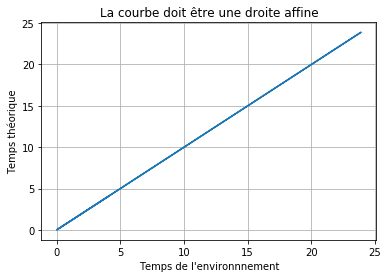

In [21]:
env_test.reset()

n = 1000
test_temps = np.zeros(n)
true_temps = np.linspace(env_test.dt,n*env_test.dt,n)%24
for k in range(n):
    env_test.temps()
    test_temps[k] = env_test.heure
    
if not (true_temps == test_temps).all :
    print("La fonction temps ne marche pas")
else :
    print("La fonction fonctionnne comme prévu")
    
plt.plot(test_temps, true_temps)
plt.grid()
plt.title("La courbe doit être une droite affine")
plt.xlabel("Temps de l'environnnement")
plt.ylabel("Temps théorique")
plt.show()

#### Fonction next_trip de la classe véhicule

Les distributions doivent être très proche


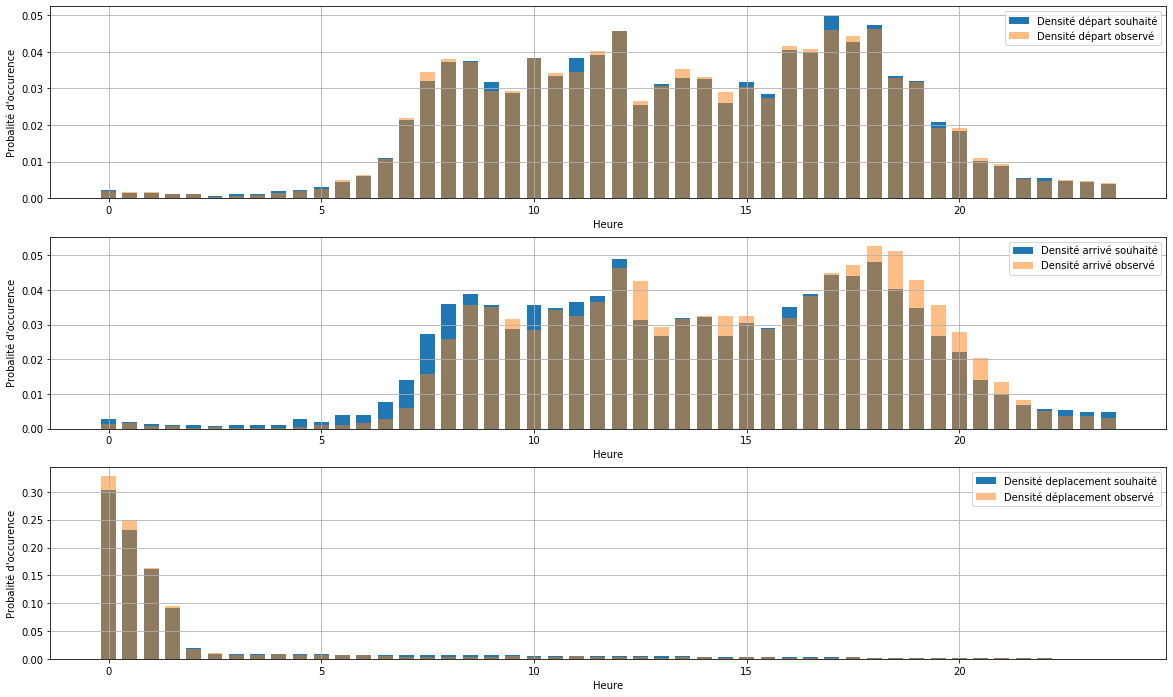

In [22]:
v = Vehicule(capacite = 1e3, number=1)
n_it = 10000
trips = np.zeros((n_it,2))
cumul_depart = np.cumsum(densite_depart)
cumul_arrive = np.cumsum(densite_arrive)
densite_deplacement = densite_deplacement3

for k in range(n_it):
    trips[k] = v.next_trip(index_heure, cumul_depart, densite_arrive, densite_deplacement)

bins = np.zeros(env_test.index_heure.size+1)
bins[:-1] = env_test.index_heure
bins[-1] = 24

histo_d, _ = np.histogram(trips[:,0], bins)
histo_d = histo_d/np.sum(histo_d)
histo_a, _ = np.histogram(trips[:,1], bins)
histo_a = histo_a/np.sum(histo_a)

temps_depl = trips[:,1] - trips[:,0]
temps_depl[temps_depl<0] = temps_depl[temps_depl<0] + 24
histo_depl, _ = np.histogram(temps_depl, bins)
histo_depl = histo_depl/np.sum(histo_depl)


width = 0.35
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
plt.bar(index_heure, densite_depart, width, label="Densité départ souhaité")
plt.bar(index_heure, histo_d, width, label = "Densité départ observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.bar(index_heure, densite_arrive, width, label="Densité arrivé souhaité")
plt.bar(index_heure, histo_a, width, label = "Densité arrivé observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.bar(index_heure, densite_deplacement, width, label="Densité deplacement souhaité")
plt.bar(index_heure, histo_depl, width, label = "Densité déplacement observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

print("Les distributions doivent être très proche")

- Il est difficile d'avoir les deux distribution visé en même temps avec cette méthode.
- La répartition qui fonctionne le mieux est la (3).
- Si on met une densité cible uniforme, c'est comme si on ne mettait pas de contrainte sur la densité cible. On peut alors observer la répartition "naturelle" des temps de trajets. On constate qu'elle n'est pas du temps représentative de la réalité car une grande poportion des voitures voyage plus de 12h ce qui n'est pas du tout le cas en réalité. Cela poserait de gros problème pour la simulation.

#### Simulation des véhicules évoluant dans l'environnement

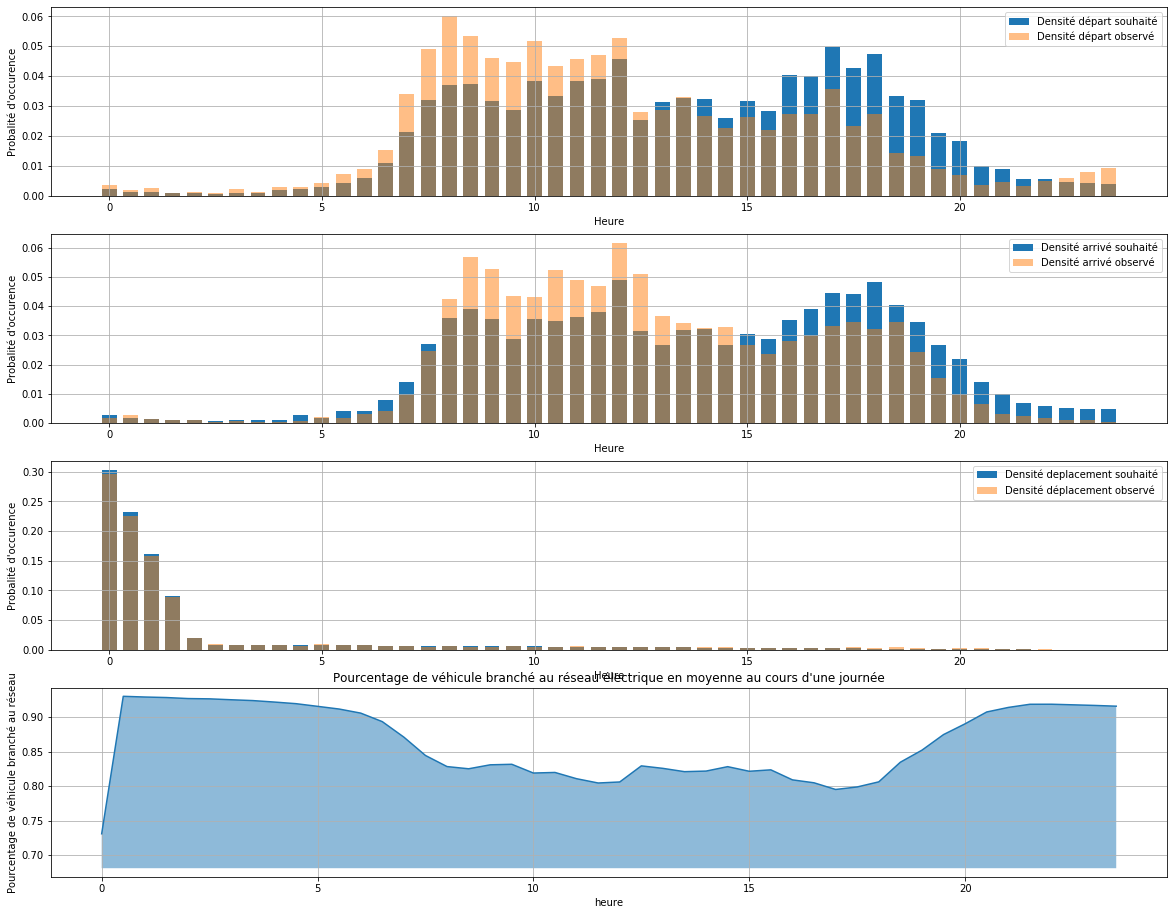

Les distributions doivent être très proche


In [26]:
dt = 0.5
nb_vehicule_tot = 10000
densite_deplacement = densite_deplacement3
env_test = Env(dt, nb_vehicule_tot, index_heure, densite_depart, densite_arrive, densite_deplacement, index_capacite, densite_capacite)

jour = 5
heure = 0
t_fin = int((24/dt)*jour + (1/dt)*heure)
env_test.play(t_fin)

################################################################################
################################################################################
################################################################################


bins = np.zeros(env_test.index_heure.size+1)
bins[:-1] = env_test.index_heure
bins[-1] = 24

histo_d, _ = np.histogram(env_test.table_circul[:,0], bins)
histo_d = histo_d/np.sum(histo_d)
histo_a, _ = np.histogram(env_test.table_circul[:,1], bins)
histo_a = histo_a/np.sum(histo_a)

temps_depl = env_test.table_circul[:,1] - env_test.table_circul[:,0]
temps_depl[temps_depl<0] = temps_depl[temps_depl<0] + 24
histo_depl, _ = np.histogram(temps_depl, bins)
histo_depl = histo_depl/np.sum(histo_depl)

################################################################################
heure = np.linspace(0,24-env_test.dt,24/env_test.dt)

width = 0.35
plt.figure(figsize=(20,16))
plt.subplot(4,1,1)
plt.bar(index_heure, env_test.densite_depart, width, label="Densité départ souhaité")
plt.bar(index_heure, histo_d, width, label = "Densité départ observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(4,1,2)
plt.bar(index_heure, env_test.densite_arrive, width, label="Densité arrivé souhaité")
plt.bar(index_heure, histo_a, width, label = "Densité arrivé observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(4,1,3)
plt.bar(index_heure, env_test.densite_deplacement, width, label="Densité deplacement souhaité")
plt.bar(index_heure, histo_depl, width, label = "Densité déplacement observé", alpha = 0.5)
plt.xlabel("Heure")
plt.ylabel("Probalité d'occurence")
plt.legend()
plt.grid()

plt.subplot(4,1,4)
plt.plot(heure, env_test.save_densite_grid)
seuil = np.min(env_test.save_densite_grid) - 0.05
plt.fill_between(heure,seuil, env_test.save_densite_grid, alpha = 0.5)
plt.grid()
plt.title("Pourcentage de véhicule branché au réseau électrique en moyenne au cours d'une journée")
plt.xlabel("heure")
plt.ylabel("Pourcentage de véhicule branché au réseau")
plt.show()

print("Les distributions doivent être très proche")